In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

In [2]:
import pandas as pd 
df=pd.read_csv('US-accidents.csv')

# 3.1

In [3]:
# เพิ่มวันที่
def ntn(day):
  if day == 1:
    return 'Monday'
  if day == 2:
    return 'Tuesday'
  if day == 3:
    return 'Wednesday'
  if day == 4:
    return 'Thursday'
  if day == 5:
    return 'Friday'
  if day == 6:
    return 'Saturday'
  if day == 0:
    return 'Sunday'
df["Day of week"]= pd.to_datetime(df['Start_Time']).dt.dayofweek.apply(ntn)
df

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Day of week
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,False,False,False,False,False,False,False,Tuesday
1,A-2687499,2,2018-02-07 11:52:27,Cleveland,OH,44130,21.9,Light Snow,False,False,False,False,False,False,False,Tuesday
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,False,False,False,False,False,False,False,Monday
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,False,False,False,False,False,False,False,Saturday
4,A-103256,4,2016-05-20 23:38:45,Columbus,OH,43215,55.9,Light Rain,False,False,False,False,False,False,True,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-1619695,2,2021-01-15 02:37:30.000000000,Glastonbury,CT,06033,34.0,Fog,False,False,False,False,False,False,False,Thursday
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,False,False,False,False,False,False,False,Thursday
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,True,True,False,False,False,False,False,Monday
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,False,False,False,False,False,False,False,Thursday


In [4]:
# ฟังชันเช็คว่าอยู่ในช่วงเวลาไหน 
import datetime
def time_in_range(x, start, end):
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end


In [5]:
# แต่ละวันเกิดอุบัติเหตุช่วงใดบ้าง
import datetime
df['morning'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(6, 0, 1), datetime.time(12, 0, 0))))
df['afternoon'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(12, 0, 1), datetime.time(18, 0, 0))))
df['evening'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(18, 0, 1), datetime.time(0, 0, 0))))
df['night'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(0, 0, 1), datetime.time(6, 0, 0))))

def time(m, a, e, n):
   if m==True : return 'morning'
   if a==True : return 'afternoon'
   if e==True : return 'evening'
   if n==True : return 'night'
df['time'] = df.apply(lambda x : time(x['morning'], x['afternoon'],x['evening'],x['night'] ),  axis=1 )
df

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,...,No_Exit,Railway,Roundabout,Stop,Day of week,morning,afternoon,evening,night,time
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,False,False,...,False,False,False,False,Tuesday,False,False,True,False,evening
1,A-2687499,2,2018-02-07 11:52:27,Cleveland,OH,44130,21.9,Light Snow,False,False,...,False,False,False,False,Tuesday,True,False,False,False,morning
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,False,False,...,False,False,False,False,Monday,False,False,True,False,evening
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,False,False,...,False,False,False,False,Saturday,False,True,False,False,afternoon
4,A-103256,4,2016-05-20 23:38:45,Columbus,OH,43215,55.9,Light Rain,False,False,...,False,False,False,True,Thursday,False,False,True,False,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-1619695,2,2021-01-15 02:37:30.000000000,Glastonbury,CT,06033,34.0,Fog,False,False,...,False,False,False,False,Thursday,False,False,False,True,night
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,False,False,...,False,False,False,False,Thursday,True,False,False,False,morning
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,True,True,...,False,False,False,False,Monday,False,True,False,False,afternoon
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,False,False,...,False,False,False,False,Thursday,False,False,False,True,night


In [6]:
import numpy as np
#เช็คว่านัันเกิดอุบัติเหตุไหม
df['Crossing'] = df['Crossing'].astype(int)
df['Give_Way'] = df['Give_Way'].astype(int)
df['Junction'] = df['Junction'].astype(int)
df['No_Exit'] = df['No_Exit'].astype(int)
df['Railway'] = df['Railway'].astype(int)
df['Roundabout'] = df['Roundabout'].astype(int)
df['Stop'] = df['Stop'].astype(int)

df['isAccident'] = df[['Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop']].sum(axis=1)
df

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,...,Railway,Roundabout,Stop,Day of week,morning,afternoon,evening,night,time,isAccident
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,0,0,...,0,0,0,Tuesday,False,False,True,False,evening,0
1,A-2687499,2,2018-02-07 11:52:27,Cleveland,OH,44130,21.9,Light Snow,0,0,...,0,0,0,Tuesday,True,False,False,False,morning,0
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,0,0,...,0,0,0,Monday,False,False,True,False,evening,0
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,0,0,...,0,0,0,Saturday,False,True,False,False,afternoon,0
4,A-103256,4,2016-05-20 23:38:45,Columbus,OH,43215,55.9,Light Rain,0,0,...,0,0,1,Thursday,False,False,True,False,evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-1619695,2,2021-01-15 02:37:30.000000000,Glastonbury,CT,06033,34.0,Fog,0,0,...,0,0,0,Thursday,False,False,False,True,night,0
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,0,0,...,0,0,0,Thursday,True,False,False,False,morning,0
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,1,1,...,0,0,0,Monday,False,True,False,False,afternoon,2
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,0,0,...,0,0,0,Thursday,False,False,False,True,night,0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

dft =pd.DataFrame(df.groupby(by=['Day of week', 'time'])['isAccident'].sum())
dft

dft_p = dft.pivot_table('isAccident','Day of week','time')
dft_p['sum'] = dft_p.sum(axis=1)
ldata = dft_p
ldata

time,afternoon,evening,morning,night,sum
Day of week,,,,,
Friday,3624,2723,2111,1930,10388
Monday,6968,3163,4380,1659,16170
Saturday,2665,2191,1565,1814,8235
Sunday,6490,2910,4104,1624,15128
Thursday,7787,3763,4225,1923,17698
Tuesday,7166,3305,4369,1849,16689
Wednesday,7270,3510,4379,1859,17018


In [8]:
# sort data by sorter
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ldata = ldata.reindex(days)
ldata = ldata.reindex(columns = ['morning', 'afternoon', 'evening', 'night'])

sumAc = 0
as_list = ldata.index.tolist()
for i,j in zip(days, range(len(days))):
  sumAc += ldata.loc[i].sum()
  as_list[j]+= " (" +str(ldata.loc[i].sum())+")"
ldata.index = as_list
ldata


time,morning,afternoon,evening,night
Sunday (15128),4104,6490,2910,1624
Monday (16170),4380,6968,3163,1659
Tuesday (16689),4369,7166,3305,1849
Wednesday (17018),4379,7270,3510,1859
Thursday (17698),4225,7787,3763,1923
Friday (10388),2111,3624,2723,1930
Saturday (8235),1565,2665,2191,1814


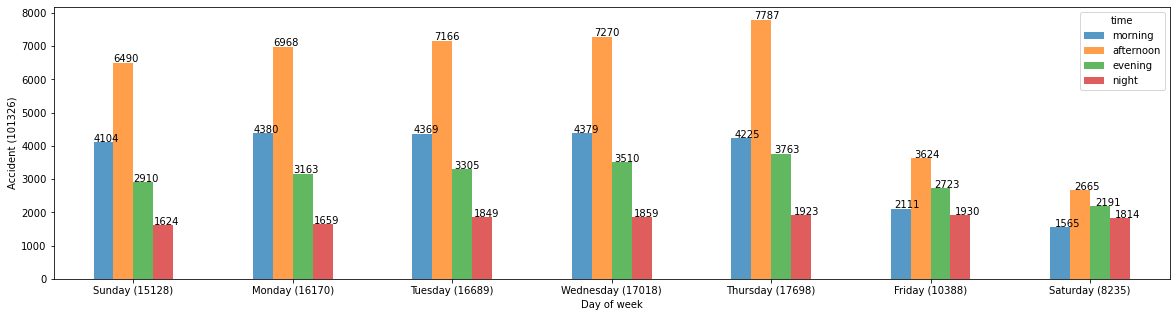

In [9]:
ax = ldata.plot(kind="bar", alpha=0.75, rot=0)
fig = ax.get_figure()
fig.set_size_inches(20, 5)
ax.set_xlabel("Day of week")
ax.set_ylabel("Accident ({})".format(sumAc))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# 3.2

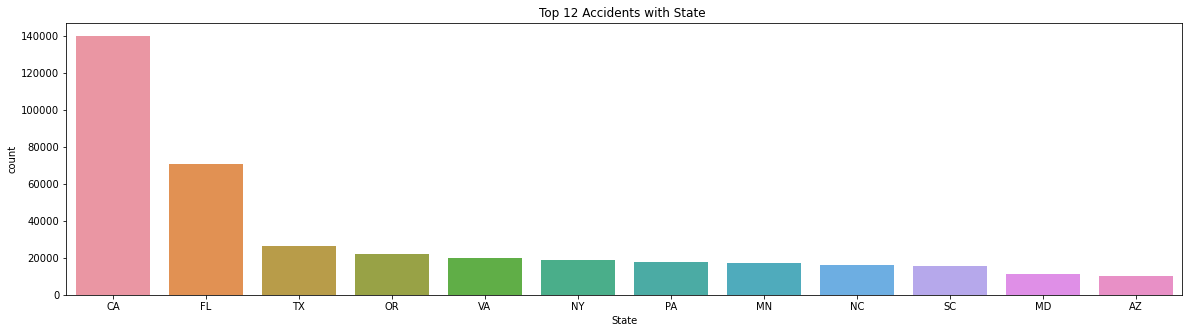

In [11]:
import pandas as pd 
data=pd.read_csv('US-accidents.csv')
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=data, orient = 'v', order = data['State'].value_counts().iloc[:12].index)
c.set_title("Top 12 Accidents with State ");

In [12]:
df_agg = df.groupby(['State', 'Weather_Condition'] ).agg({'isAccident':sum})
g = df_agg['isAccident'].groupby('State', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False))
c = res.to_frame()
c
byState = c.pivot_table('isAccident',['State'], 'Weather_Condition')
byState['sum'] = byState.sum(axis=1)
sortbyStateSum = byState.sort_values(by=['sum'], ascending = False)
sortbyStateSum.sort_values(by='sum', ascending=False).head(12)

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drizzle,Drizzle and Fog,Fair,...,Thunder / Wintry Mix / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy,sum
State,,,,,,,,,,,,,,,,,,,,,
CA,3.0,0.0,NaN,NaN,2858.0,2591.0,35.0,11.0,NaN,12692.0,...,NaN,13.0,0.0,0.0,NaN,1.0,1.0,2.0,NaN,26983.0
FL,NaN,NaN,NaN,NaN,533.0,1355.0,18.0,0.0,NaN,6271.0,...,NaN,158.0,21.0,9.0,0.0,1.0,NaN,NaN,NaN,15782.0
TX,1.0,NaN,NaN,NaN,509.0,658.0,9.0,5.0,0.0,1593.0,...,0.0,6.0,5.0,4.0,NaN,1.0,NaN,4.0,NaN,5496.0
NY,NaN,NaN,0.0,0.0,285.0,675.0,22.0,0.0,3.0,1150.0,...,NaN,4.0,0.0,NaN,NaN,NaN,NaN,15.0,NaN,4888.0
AZ,NaN,NaN,NaN,NaN,245.0,159.0,1.0,1.0,NaN,2603.0,...,NaN,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3950.0
PA,NaN,NaN,NaN,NaN,145.0,748.0,20.0,2.0,NaN,1271.0,...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,3669.0
NC,NaN,NaN,NaN,NaN,180.0,446.0,2.0,4.0,0.0,928.0,...,NaN,3.0,5.0,1.0,NaN,NaN,NaN,4.0,NaN,3631.0
MN,NaN,NaN,0.0,0.0,140.0,554.0,12.0,5.0,0.0,1141.0,...,NaN,1.0,1.0,0.0,NaN,NaN,NaN,18.0,NaN,3041.0
OR,NaN,0.0,NaN,NaN,182.0,578.0,7.0,4.0,NaN,752.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2980.0


In [13]:
# 3.2.1
c
top5 = c.groupby(level=0).head(5)
top5

isAccident
State Weather_Condition            
AL    Fair                      157
      Cloudy                     80
      Mostly Cloudy              63
      Partly Cloudy              41
      Clear                      32
...                             ...
WY    Cloudy                      4
      Fair / Windy                3
      Overcast                    3
      Clear                       2
      Light Snow                  2

[245 rows x 1 columns]

# 3.3

In [30]:
import pandas as pd 
data=pd.read_csv('US-accidents.csv')

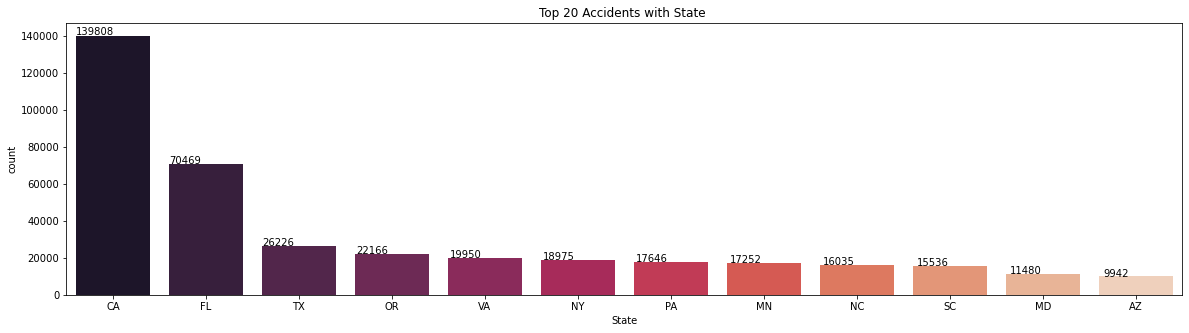

In [32]:
# Chart 1 Top 20 most accident with State 
# กราฟแสดงรัฐที่เกิดอุบัติเหตุมากที่สุด 20 อันดับ โดยรัฐที่มากที่สุดคือ CA california
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=data, orient = 'v', palette = "rocket", order = data['State'].value_counts().iloc[:12].index)
c.set_title("Top 20 Accidents with State ");
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

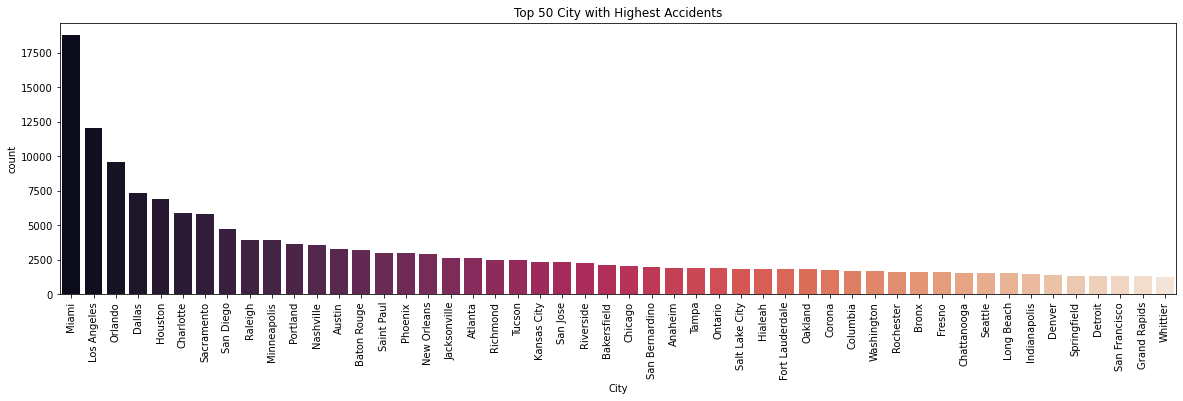

In [33]:
# Chart 2 Top 50 Accident with CIty
# แสดง 50 อันดับเมืองที่เกิดอุบัติเหตุมากที่สุด เมืองที่มากที่สุดคือ ไมอามี
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=data, order=data.City.value_counts().iloc[:50].index, orient = 'v', palette = "rocket")
c.set_title("Top 50 City with Highest Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [34]:
data['Month'] = pd.to_datetime(data['Start_Time']).dt.month
data['Year'] = pd.to_datetime(data['Start_Time']).dt.year
data['Hour'] = pd.to_datetime(data['Start_Time']).dt.hour
data['Weekday'] = pd.to_datetime(data['Start_Time']).dt.weekday
#Year
data_2016 = data[data.Start_Time.dt.year == 2016]
data_2017 = data[data.Start_Time.dt.year == 2017]
data_2018 = data[data.Start_Time.dt.year == 2018]
data_2019 = data[data.Start_Time.dt.year == 2019]
data_2020 = data[data.Start_Time.dt.year == 2020]
data_2017_2019 = data[(data["Year"] >= 2017) & (data["Year"] <= 2019)]
data.Start_Time.dt.year == 2016


AttributeError: Can only use .dt accessor with datetimelike values

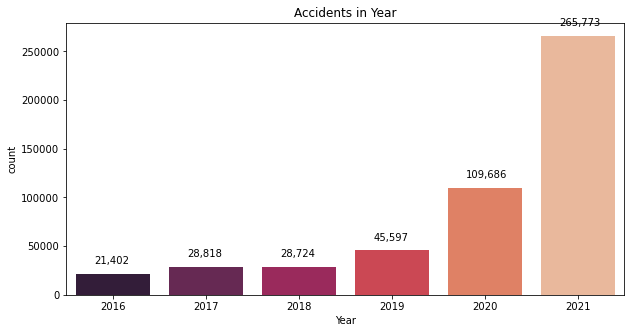

In [35]:
# Chart3 accident in year
# จำนวนอุบัติเหตุตั้งแต่ปี 2016 - 2021
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=data, orient = 'v', palette = "rocket")
c.set_title("Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

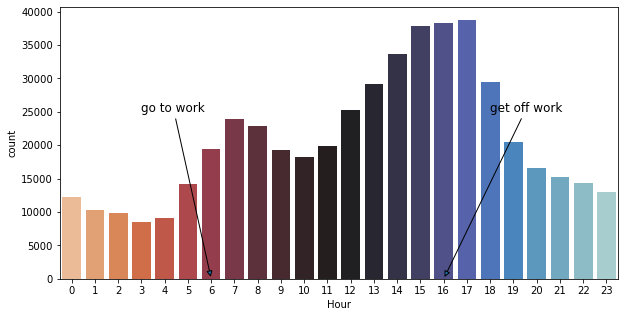

In [27]:
# Chart 4 Accident in hour
# จำนวนอุบัติเหตุด้วยชั่วโมงทำให้เห็นว่า ช่วงเวลาที่คนไปทำงานกับเริ่มงานจะมีอุบัติเหตุมาก
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=data, orient = 'v', palette = "icefire_r")
plt.annotate('go to work',xy=(6,0),xytext=(3,25000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,25000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

NameError: name 'data_2019' is not defined

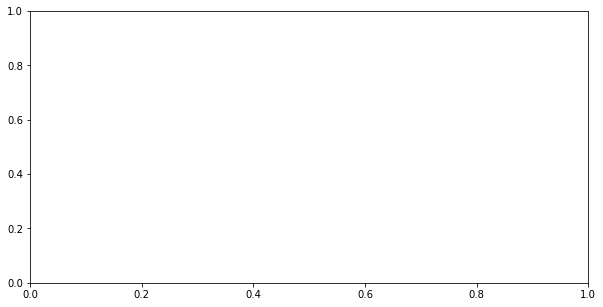

In [26]:
# Chart 5 Accident in year 2019
# แสดงอุบัติเหตแต่ละเดือนในปี 2019
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2019, orient = 'v', palette = "rocket")
c.set_title("Accidents in Month of Year 2019")
plt.show()

NameError: name 'data_2016' is not defined

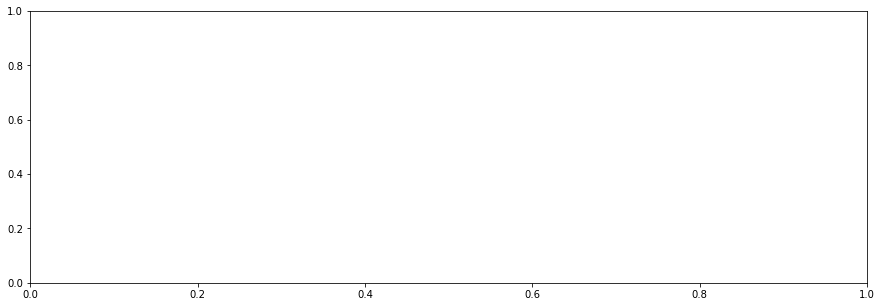

In [25]:
# Chart 6 accident all week
# จำนวนอุบัติเหตุแต่ละสัปดาห์ในปี 2020 
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "rocket")
c.set_title("Accidents in Week of 2020")
plt.show()

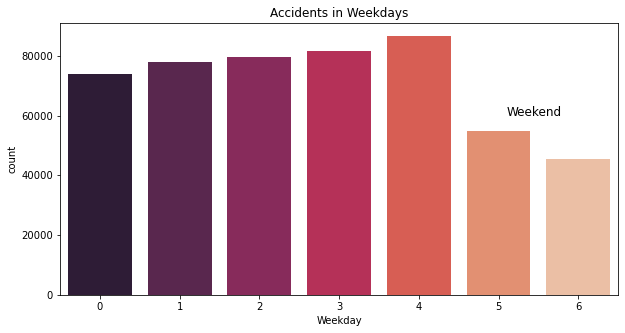

In [24]:
# Chart 7 Accident in Week day
# แสดงจำนวนอุบัติเหตุในแต่ละวัน อาทิตย์ - เสาร์ ทำให้เห็นว่าช่วง ศุกร์และเสาร์อุบัติเหตุจะน้อยเพราะคนหยุดงาน
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=data, orient = 'v', palette = "rocket")
plt.annotate('Weekend',xy=(5.1,60000), fontsize=12)
c.set_title("Accidents in Weekdays")
plt.show()